In [2]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '../mupClassification/');  sys.path.insert(0, '../off_beam_on_beam_5e19/'); sys.path.insert(0, '../axial_mass_from_run1_data/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from axial_mass_tools import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/Janet28Questions/'

In [10]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
GENIE_CC1p0pi = GENIEall[GENIEall['IsCC_1p_200MeVc_0pi']==1]
GENIE_CC1p0pi_reconstructed = GENIE_CC1p0pi[GENIE_CC1p0pi['IsVertexReconstructed']==1]

In [3]:
Afro_genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/mA/genie_files/argon40_numu_mA_0_99.csv')
CC1p0pi_Afro_genie_sample = Afro_genie_sample[Afro_genie_sample['CC1p0pi']==True]
print 'len(CC1p0pi):',len(CC1p0pi_Afro_genie_sample)

len(CC1p0pi): 21916


In [16]:
GENIE_AdiOverlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/Adi_new_overlay_small_genie_reduced.csv')
print len(GENIE_AdiOverlay),'CC interactions pairs in GENIE'
CC_Np_200MeVc = GENIE_AdiOverlay[(GENIE_AdiOverlay['IsCC_Np_200MeVc']==True)]
CC_Np_200MeVc_contained = CC_Np_200MeVc[(CC_Np_200MeVc['IsVertexContained']==True)]
CC_Np_200MeVc_mu_reco = CC_Np_200MeVc_contained[(CC_Np_200MeVc_contained['Is_mu_TrackReconstructed']==True)]
CC_Np_200MeVc_mu_recoInFV = CC_Np_200MeVc_mu_reco[(CC_Np_200MeVc_mu_reco['Is_mu_TrackInFV']==True)]
CC_Np_200MeVc_vertex_recoInFV = CC_Np_200MeVc_mu_recoInFV[(CC_Np_200MeVc_mu_recoInFV['IsVertexReconstructed']==True)&(CC_Np_200MeVc_mu_recoInFV['IsVertexInFV']==True)]
print "len(CC_Np_200MeVc_vertex_recoInFV):",len(CC_Np_200MeVc_vertex_recoInFV)

384 CC interactions pairs in GENIE
len(CC_Np_200MeVc_vertex_recoInFV): 47


# q. 5
The solid angle of the detector is 5 mrads.
			Do we correct for this rotation in the simulation in order to match data?
			In fact, we need to think about beam width and parallax, because a neutrino with a 400 m travel distance actually has an opening angle of 6.25 mrads.
			Note that this will be flavor dependent. A consequence of not getting this right is that your muon angle distribution in the xsecs will be wrong.
			It also affects any analysis looking for transverse momentum or


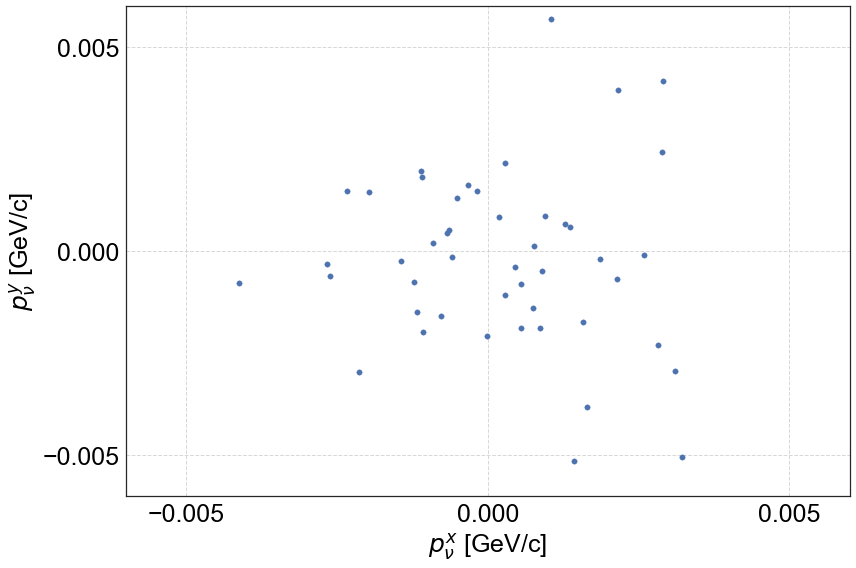

In [18]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(CC_Np_200MeVc_vertex_recoInFV['truth_Pv_x'],CC_Np_200MeVc_vertex_recoInFV['truth_Pv_y'],s=30);
set_axes(ax,r'$p_\nu^x$ [GeV/c]',r'$p_\nu^y$ [GeV/c]'
         ,xticks=[-0.005,0,0.005],xlim=(-0.006,0.006),yticks=[-0.005,0,0.005],ylim=(-0.006,0.006),do_add_grid=True)
plt.tight_layout()
plt.savefig(figures_path+'q5_Pvx_vs_Pvy.pdf')

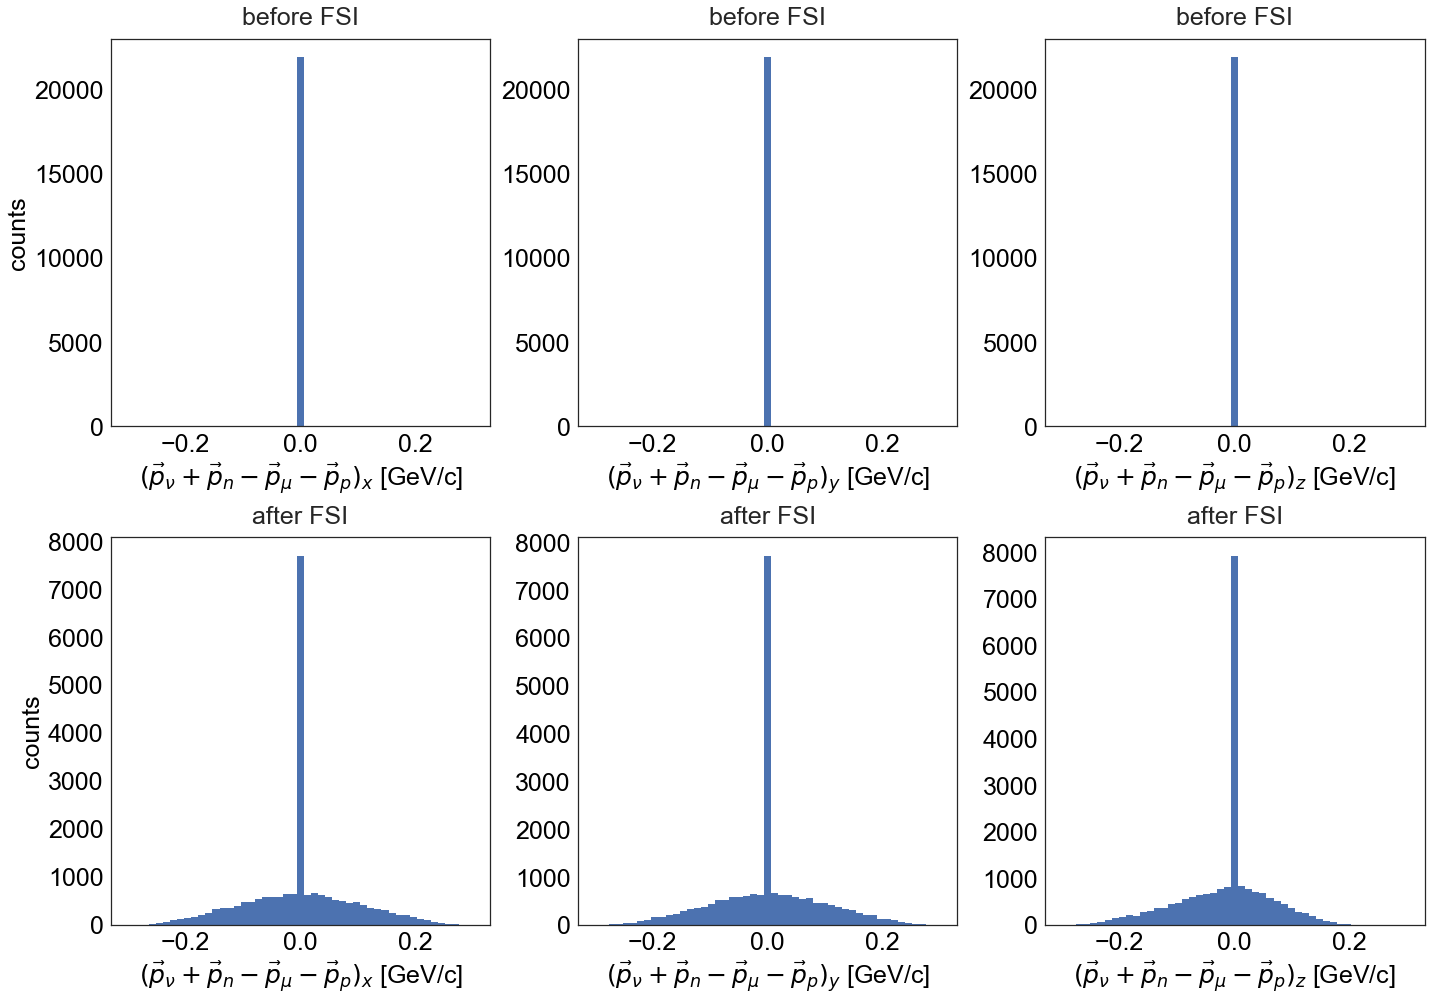

In [14]:
fig=plt.figure(figsize=(20,14))
for i_dir,direction in enumerate(['x','y','z']):
    
    ax=fig.add_subplot(2,3,i_dir+1)
    P_nu_n = CC1p0pi_Afro_genie_sample['p'+direction+'v']+CC1p0pi_Afro_genie_sample['p'+direction+'n']
    P_mu_p = CC1p0pi_Afro_genie_sample['Pmu_'+direction]+CC1p0pi_Afro_genie_sample['Pp_before_FSI_'+direction]
    plt.hist( P_nu_n-P_mu_p, bins=np.linspace(-0.3,0.3,50))
    set_axes(ax
             ,r'$(\vec{p}_\nu+\vec{p}_n - \vec{p}_\mu - \vec{p}_p)_{'+direction+'}$ [GeV/c]'
             ,'counts' if i_dir==0 else ''
             ,title='before FSI'
            )

    ax=fig.add_subplot(2,3,i_dir+1+3)
    P_nu_n = CC1p0pi_Afro_genie_sample['p'+direction+'v']+CC1p0pi_Afro_genie_sample['p'+direction+'n']
    P_mu_p = CC1p0pi_Afro_genie_sample['Pmu_'+direction]+CC1p0pi_Afro_genie_sample['Pp_'+direction]
    plt.hist( P_nu_n-P_mu_p, bins=np.linspace(-0.3,0.3,50))
    set_axes(ax
             ,r'$(\vec{p}_\nu+\vec{p}_n - \vec{p}_\mu - \vec{p}_p)_{'+direction+'}$ [GeV/c]'
             ,'counts' if i_dir==0 else ''
             ,title='after FSI')
    

plt.tight_layout()
plt.savefig(figures_path+'momentum_conservation.pdf')

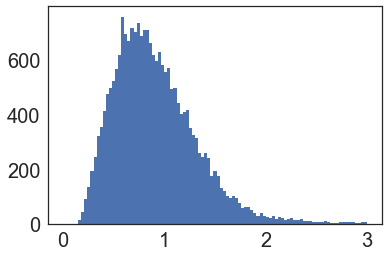

In [6]:
plt.hist(CC1p0pi_Afro_genie_sample['Ev'],bins=np.linspace(0,3,100));